<a href="https://colab.research.google.com/github/derzhavin3016/CompMath/blob/master/Lab8/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя лабораторная работа №8 по вычислительной математике

Державин Андрей, Б01-909

## Задача XI.9.2 a)

Получите численное решение нелинейной краевой задачи
$$
y'' + px\cdot \cos{y} = 0, \:\: 0 < x \leq 1,  
$$
$$
y(0) = 0, \: y(1) = 0
$$
$$
p = 1, 4, 7, 25, 50, 100
$$

### Описание метода

Имеем краевую задачу:
$$
\left\lbrace
\begin{matrix}
y'' + px\cdot \cos{y} &=& 0, \:\: x \in \left( 0, 1\right] \\
y(0) &=& 0\\
y(1) &=& 0
\end{matrix}
\right.
$$

Зададимся начальным значением производной $\alpha$:
$$
\left\lbrace
\begin{matrix}
y(0) &=& 0\\
y'(0) &=& \alpha\\
y'' + px\cdot \cos{y} &=& 0, \:\: x \in \left( 0, 1\right] \\
\end{matrix}
\right.
$$
Распишем разностную задачу для этой системы ($h$ - шаг по $x$):
$$
\left\lbrace
\begin{matrix}
y_0 &=& 0\\
y_1 &=& h\alpha\\
\frac{y_{k+1} - 2y_k + y_{k-1}}{h^2} &=& - px\cdot \cos{y_k}, \:
k = \overline{1\dots n}
\end{matrix}
\right.
$$
Решая эту систему, получаем значение в правой точке - $y_{n+1}$. Метод будет завершён, когда $\left|y_{n+1} - y(1) \right| < \varepsilon$, то есть, по сути, задача сводится к нахождению нуля функции
$$
F(\alpha) = y(1) - y_{n+1}(\alpha)
$$
Решим методом Ньютона:
$$
\alpha_{k+1} = \alpha_k - \frac{F(\alpha_k)}{F'(\alpha_k)},
$$
где
$$
F'(\alpha_k) = \frac{F(\alpha_k) - F(\alpha_{k-1})}{\alpha_k - \alpha_{k-1}}
$$

### Реализация

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [53]:
EPSILON = 1e-10
A = 0
B = 1
Y1 = 0

In [54]:
def shoot(h, p, alpha):
  y = [0, h * alpha]
  ypprev = y[0]
  yprev = y[1]
  for x in np.arange(A + h, B, h):
    ycur = -p * x * h**2 * np.cos(yprev) - ypprev + 2 * yprev
    y.append(ycur)
    ypprev = yprev
    yprev = ycur
  
  return y

def newton(h, p, alpha):
  y = shoot(h, p, alpha)
  Fprev = Y1 - y[-1]
  aprev = alpha

  alpha += 1 if Fprev > 0 else -1
  diff = 2 * EPSILON
  while diff >= EPSILON:
    y = shoot(h, p, alpha)
    F = Y1 - y[-1]
    dF = (F - Fprev) / (alpha - aprev)
    aprev = alpha
    Fprev = F

    diff = F / dF

    alpha = alpha - diff

    diff = abs(diff)

  return y, alpha

def make_plot(h, p, alpha):
  y, alpha_fin = newton(h, p, alpha)

  plt.figure(figsize=[16, 9])
  plt.plot(np.arange(A, B + h, h), y, "b.")
  plt.title(f"Решение $y(x)$ с параметром p = {p}, $y'({A})$ = {alpha_fin}")
  plt.xlabel("$x$", fontsize=20)
  plt.ylabel("$y$", fontsize=20)
  plt.grid()
  plt.show()


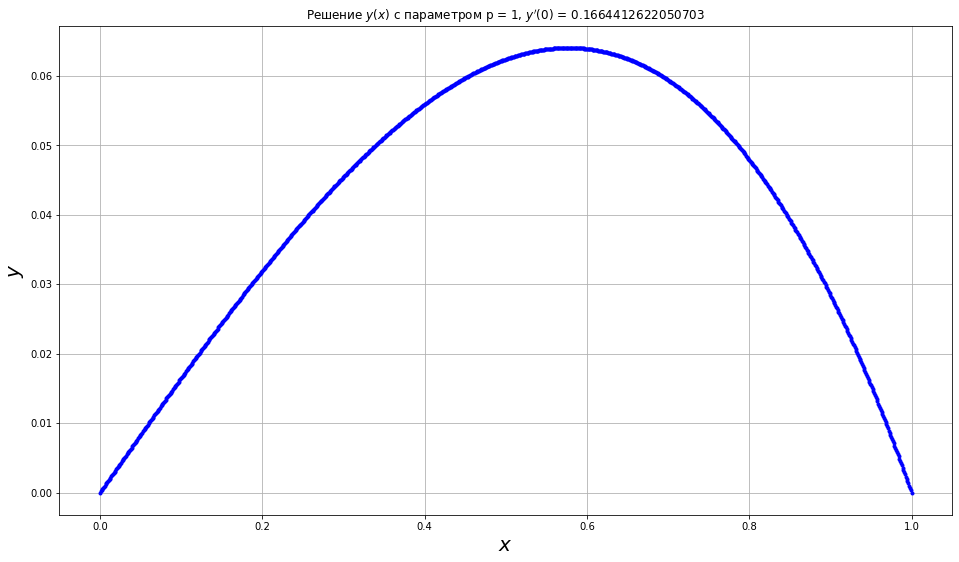

In [55]:
make_plot(1e-3, 1, 0.0)

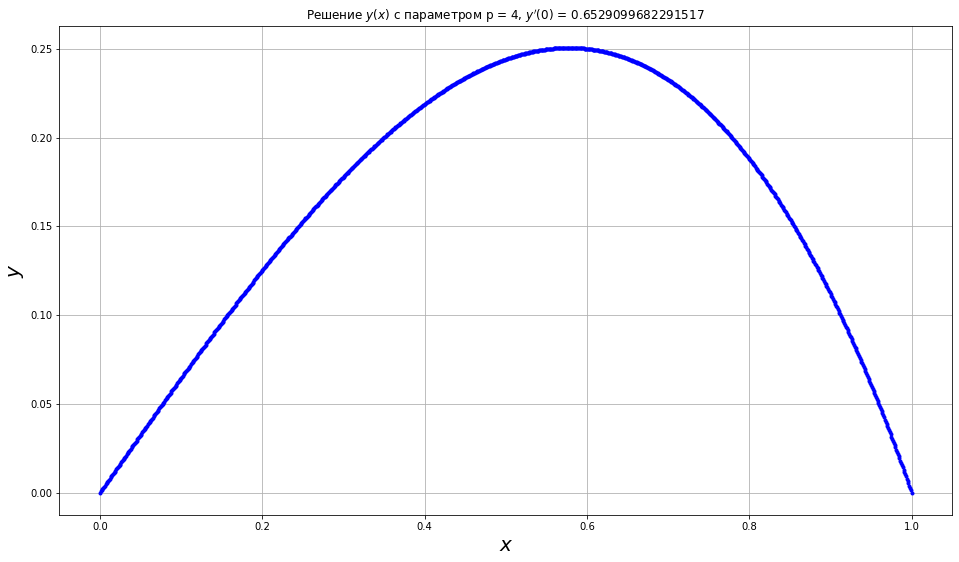

In [56]:
make_plot(1e-3, 4, 0.0)

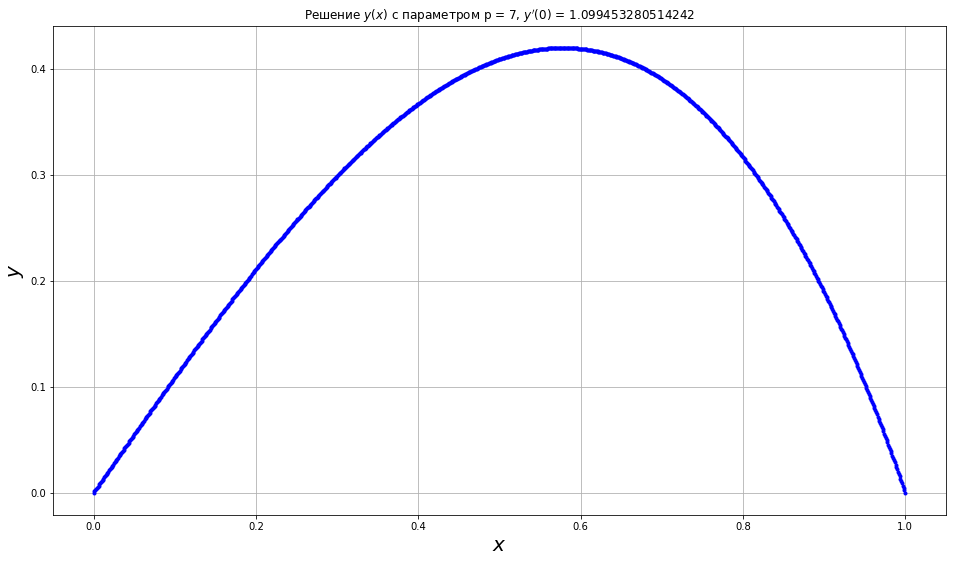

In [57]:
make_plot(1e-3, 7, 1)

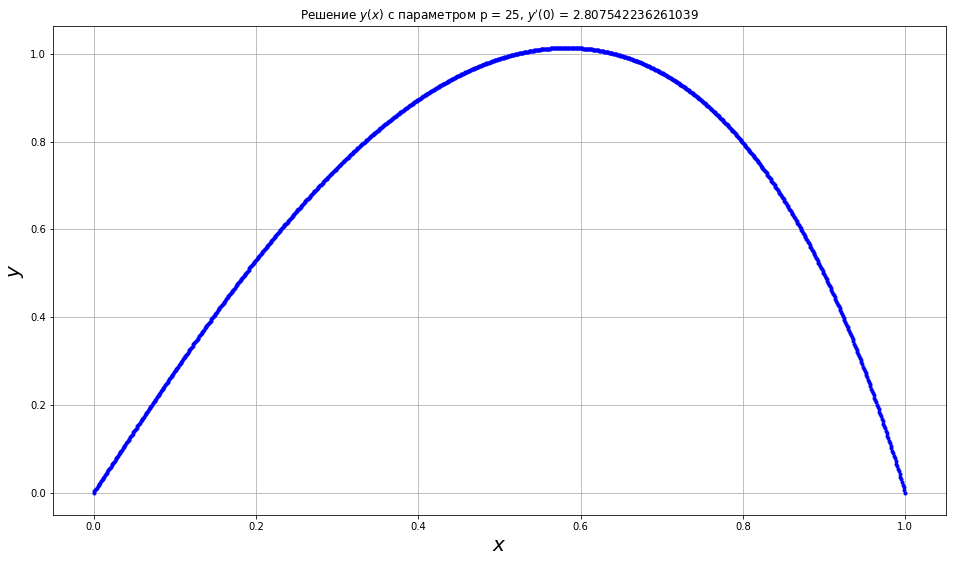

In [58]:
make_plot(1e-3, 25, 2.5)

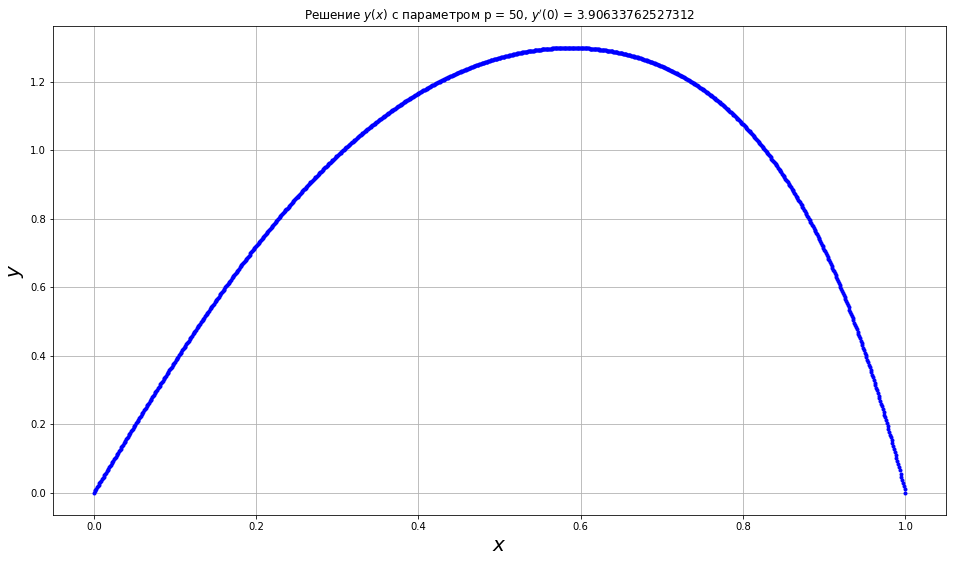

In [59]:
make_plot(1e-3, 50, 4)

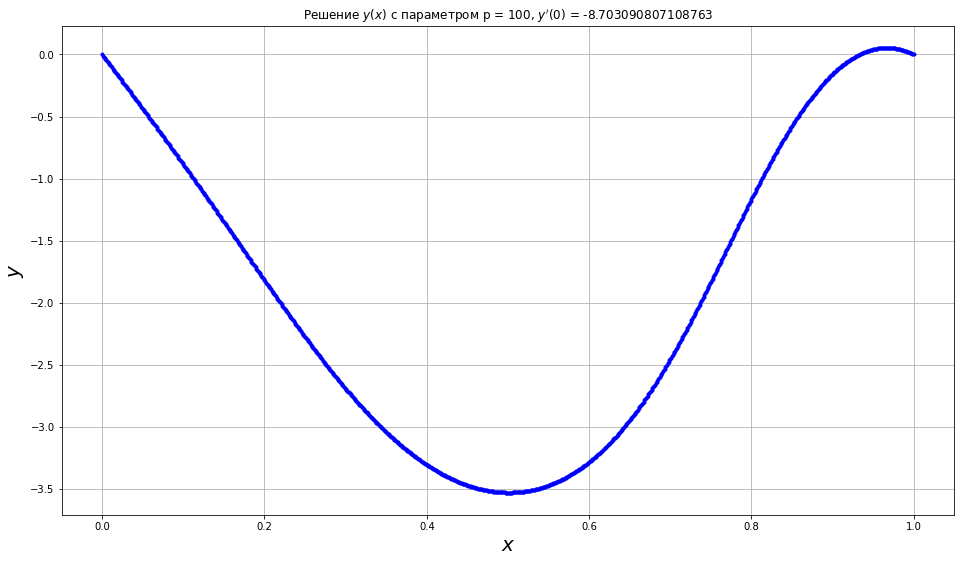

In [61]:
make_plot(1e-3, 100, -9)